## Mini-batch Gradient Descent

**Mini-batch GD** is a hybrid approach that sits between Batch GD and Stochastic GD. Instead of using all data (Batch) or one example (Stochastic), it uses small random subsets (mini-batches) of the training data for each gradient computation.

### Performance boost from hardware optimization of matrix operations

- **GPUs** are optimized for parallel matrix operations
- Processing 32 examples together is **much faster** than processing 32 examples one-by-one
- Mini-batches leverage **vectorization** and **parallel processing**

### Closer to minimum that SGD but harder to escape local minima

- Less noise --> more precise convergance near minimum
- Less noise --> less ability to jump out of local minima

### Visual Comparision

```
Parameter Space Paths:

Batch GD:      ○───○───○───○───●      (Smooth, direct to minimum)
Mini-batch GD: ○─○─○──○──○─○─○─○       (Some noise, near minimum)
SGD:           ○○○○○○○○○○○○○○○○○       (Very noisy, around minimum)

● = Final position (Batch GD stops exactly at minimum)
```



Final Parameters:
Batch GD:      θ₀ = 4.215096, θ₁ = 2.770113
Stochastic GD: θ₀ = 4.184753, θ₁ = 2.730367
Mini-batch GD: θ₀ = 4.238513, θ₁ = 2.799043
True values:   θ₀ = 4.000000, θ₁ = 3.000000


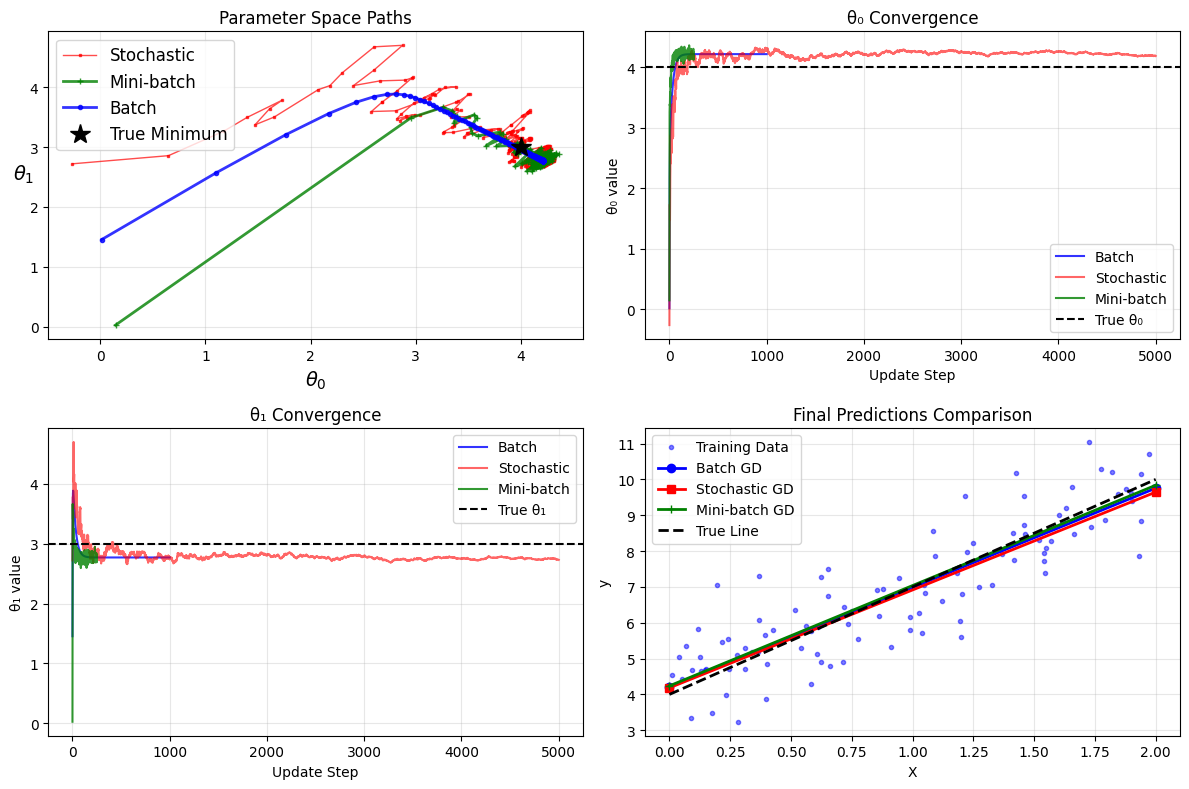


Convergence Analysis:
Batch GD steps: 1001
Stochastic GD steps: 5001
Mini-batch GD steps: 251


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100, 1)), X]
m = len(X_b)

true_theta = np.array([[4], [3]])


def run_batch_gradient_descent(n_iterations=1000, eta=0.1):
    theta = np.random.randn(2, 1)
    theta_path = [theta.copy()]

    for iteration in range(n_iterations):
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        theta_path.append(theta.copy())

    return np.array(theta_path).squeeze()


def run_stochastic_gradient_descent(n_epochs=50, t0=5, t1=50):
    theta = np.random.randn(2, 1)
    theta_path = [theta.copy()]

    def learning_schedule(t):
        return t0 / (t + t1)

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index : random_index + 1]
            yi = y[random_index : random_index + 1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients
            theta_path.append(theta.copy())

    return np.array(theta_path).squeeze()


def run_minibatch_gradient_descent(n_epochs=50, minibatch_size=20, t0=200, t1=1000):
    theta = np.random.randn(2, 1)
    theta_path = [theta.copy()]
    t = 0

    def learning_schedule(t):
        return t0 / (t + t1)

    for epoch in range(n_epochs):
        # shuffle the data each epoch
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i : i + minibatch_size]
            yi = y_shuffled[i : i + minibatch_size]
            gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients
            theta_path.append(theta.copy())

    return np.array(theta_path).squeeze()


theta_path_bgd = run_batch_gradient_descent()
theta_path_sgd = run_stochastic_gradient_descent()
theta_path_mgd = run_minibatch_gradient_descent()

print("\nFinal Parameters:")
print(
    f"Batch GD:      θ₀ = {theta_path_bgd[-1, 0]:.6f}, θ₁ = {theta_path_bgd[-1, 1]:.6f}"
)
print(
    f"Stochastic GD: θ₀ = {theta_path_sgd[-1, 0]:.6f}, θ₁ = {theta_path_sgd[-1, 1]:.6f}"
)
print(
    f"Mini-batch GD: θ₀ = {theta_path_mgd[-1, 0]:.6f}, θ₁ = {theta_path_mgd[-1, 1]:.6f}"
)
print(f"True values:   θ₀ = 4.000000, θ₁ = 3.000000")

plt.figure(figsize=(12, 8))

# Plot 1: Parameter space paths
plt.subplot(2, 2, 1)
plt.plot(
    theta_path_sgd[:, 0],
    theta_path_sgd[:, 1],
    "r-s",
    linewidth=1,
    markersize=2,
    label="Stochastic",
    alpha=0.7,
)
plt.plot(
    theta_path_mgd[:, 0],
    theta_path_mgd[:, 1],
    "g-+",
    linewidth=2,
    markersize=4,
    label="Mini-batch",
    alpha=0.8,
)
plt.plot(
    theta_path_bgd[:, 0],
    theta_path_bgd[:, 1],
    "b-o",
    linewidth=2,
    markersize=3,
    label="Batch",
    alpha=0.8,
)
plt.plot(true_theta[0], true_theta[1], "k*", markersize=15, label="True Minimum")
plt.legend(loc="upper left", fontsize=12)
plt.xlabel(r"$\theta_0$", fontsize=14)
plt.ylabel(r"$\theta_1$", fontsize=14, rotation=0)
plt.title("Parameter Space Paths")
plt.grid(True, alpha=0.3)

# Plot 2: θ₀ convergence over time
plt.subplot(2, 2, 2)
plt.plot(theta_path_bgd[:, 0], "b-", label="Batch", alpha=0.8)
plt.plot(theta_path_sgd[:, 0], "r-", label="Stochastic", alpha=0.6)
plt.plot(theta_path_mgd[:, 0], "g-", label="Mini-batch", alpha=0.8)
plt.axhline(y=4, color="k", linestyle="--", label="True θ₀")
plt.xlabel("Update Step")
plt.ylabel("θ₀ value")
plt.title("θ₀ Convergence")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: θ₁ convergence over time
plt.subplot(2, 2, 3)
plt.plot(theta_path_bgd[:, 1], "b-", label="Batch", alpha=0.8)
plt.plot(theta_path_sgd[:, 1], "r-", label="Stochastic", alpha=0.6)
plt.plot(theta_path_mgd[:, 1], "g-", label="Mini-batch", alpha=0.8)
plt.axhline(y=3, color="k", linestyle="--", label="True θ₁")
plt.xlabel("Update Step")
plt.ylabel("θ₁ value")
plt.title("θ₁ Convergence")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Final predictions comparison
plt.subplot(2, 2, 4)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# make predictions with each method
y_pred_bgd = X_new_b.dot(theta_path_bgd[-1])
y_pred_sgd = X_new_b.dot(theta_path_sgd[-1])
y_pred_mgd = X_new_b.dot(theta_path_mgd[-1])
y_true = 4 + 3 * X_new  # true without noise

plt.plot(X, y, "b.", alpha=0.5, label="Training Data")
plt.plot(X_new, y_pred_bgd, "b-o", label="Batch GD", linewidth=2)
plt.plot(X_new, y_pred_sgd, "r-s", label="Stochastic GD", linewidth=2)
plt.plot(X_new, y_pred_mgd, "g-+", label="Mini-batch GD", linewidth=2)
plt.plot(X_new, y_true, "k--", label="True Line", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Final Predictions Comparison")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# analysis
print("\nConvergence Analysis:")
print(f"Batch GD steps: {len(theta_path_bgd)}")
print(f"Stochastic GD steps: {len(theta_path_sgd)}")
print(f"Mini-batch GD steps: {len(theta_path_mgd)}")